<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      45 non-null     datetime64[ns]
 1   Region    45 non-null     object        
 2   Manager   45 non-null     object        
 3   SalesMan  45 non-null     object        
 4   Item      45 non-null     object        
 5   Units     45 non-null     int64         
 6   Price     45 non-null     float64       
 7   Sales     45 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 2.9+ KB


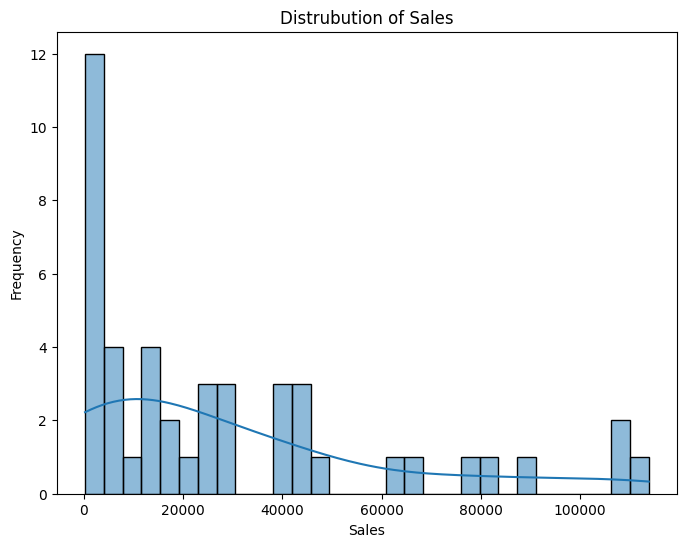

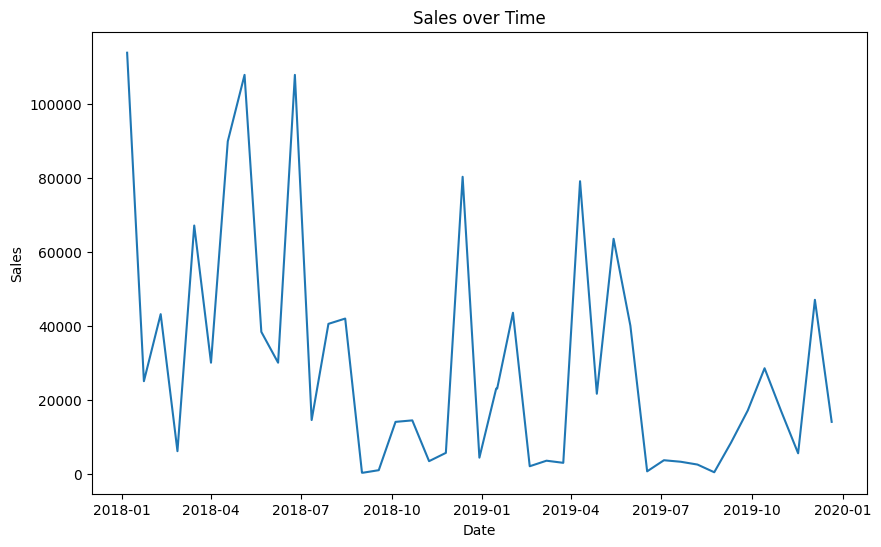

In [5]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# load the excel file
df = pd.read_excel('salesdata.xlsx')
# Display the first few rows
df.head()
# Display summary information about the dataset
df.info()
# Display summary statistics about the dataset
df.describe()
# Perform basic data cleaning
# Remove duplicates
df = df.drop_duplicates()
# Drop rows with missing values
df = df.dropna()
# Visualize the distribution 
plt.figure(figsize=(8, 6))
sns.histplot(df['Sales'], bins=30, kde=True)
plt.title('Distrubution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()
# Visualize sales over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Sales', data=df)
plt.title('Sales over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()
df.to_excel('cleaned_sales_data.xlsx', index=False)